In [1]:
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
import tensorflow as tf

I0000 00:00:1763871403.208872    8494 port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
I0000 00:00:1763871403.592511    8494 cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
I0000 00:00:1763871406.156411    8494 port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:

train_clean = r'/home/pavan/Downloads/SUTD/Project/DCANet/dataset/train/clean/'
train_noisy = r'/home/pavan/Downloads/SUTD/Project/DCANet/dataset/train/dirty/'

val_clean = r'/home/pavan/Downloads/SUTD/Project/DCANet/dataset/val/clean/'
val_noisy = r'/home/pavan/Downloads/SUTD/Project/DCANet/dataset/val/dirty/'


In [11]:
train_clean_generator = tf.keras.preprocessing.image_dataset_from_directory(
    directory=train_clean,
    labels=None,
    shuffle=False,

)

train_noisy_generator = tf.keras.preprocessing.image_dataset_from_directory(
    directory=train_noisy,
    labels=None,
    shuffle=False
)

Found 20001 files.
Found 20001 files.


In [12]:
train_dataset = tf.data.Dataset.zip((train_noisy_generator, train_clean_generator))
train_dataset = train_dataset.prefetch(tf.data.AUTOTUNE)

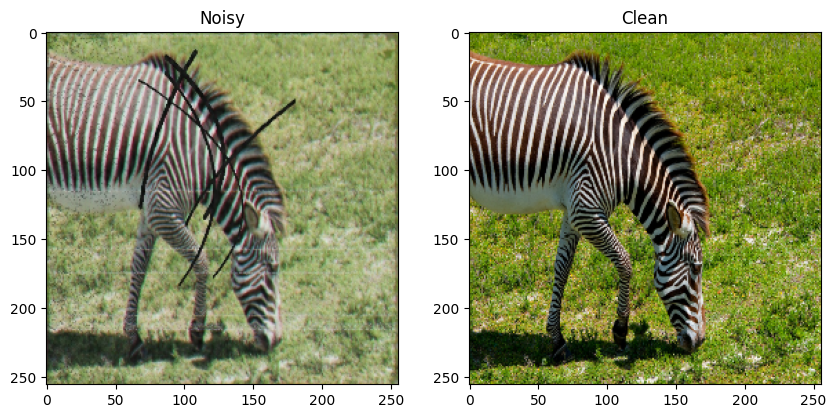

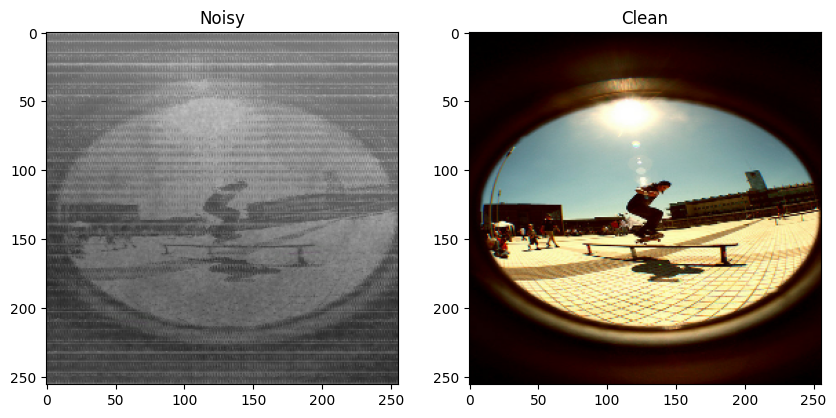

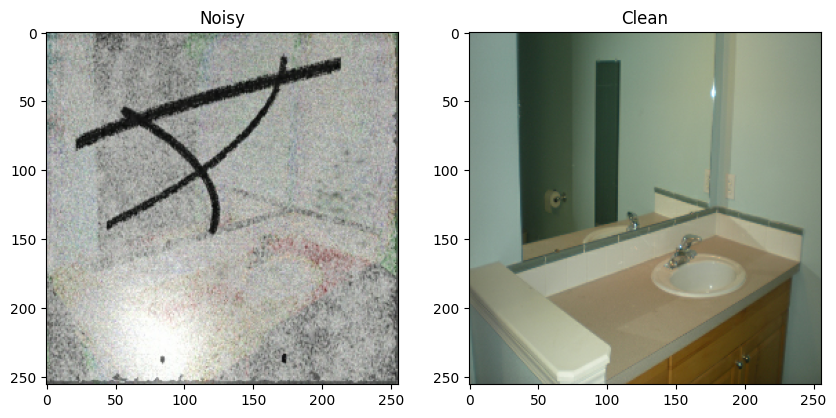

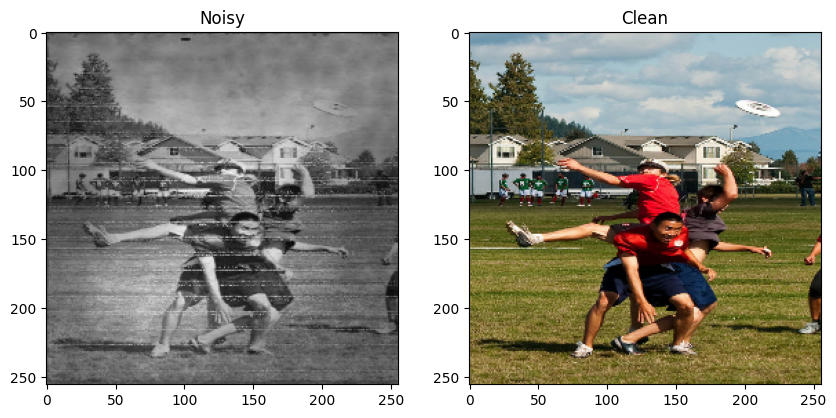

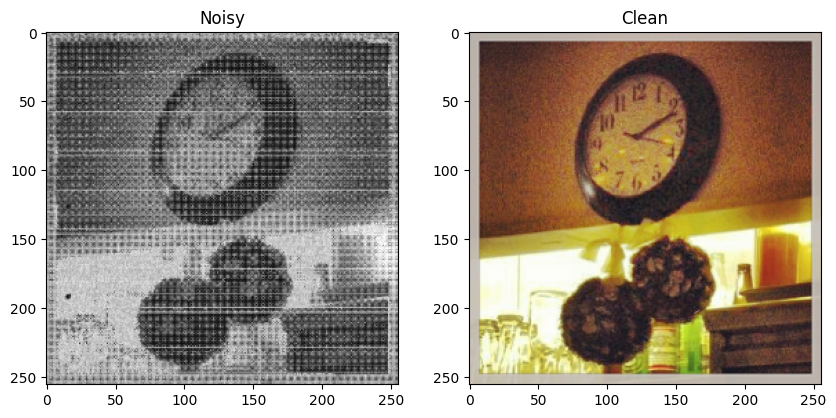

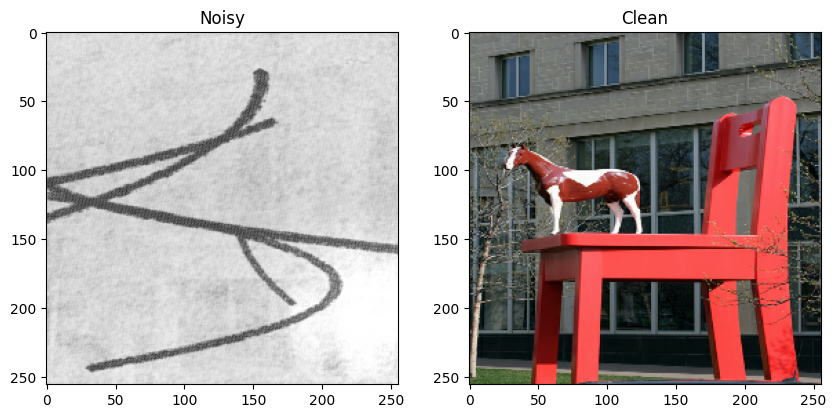

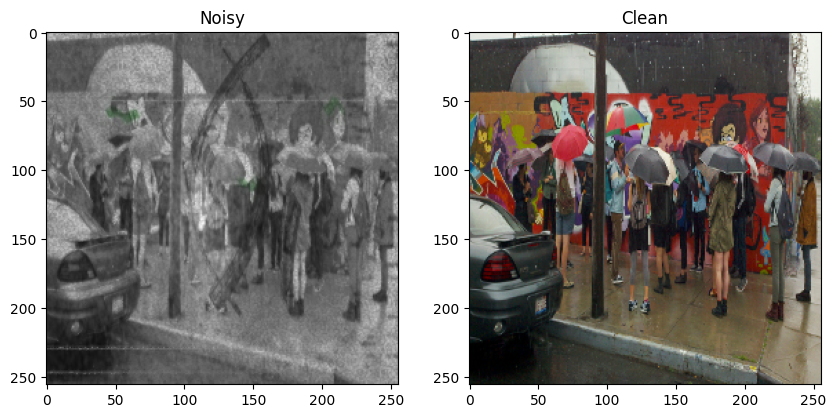

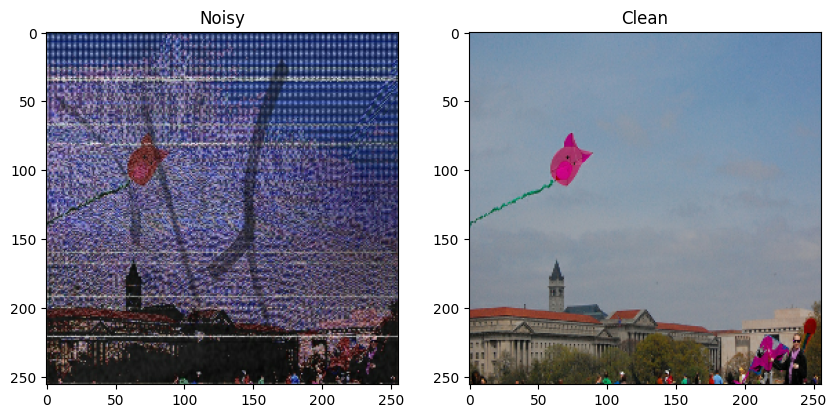

In [19]:
for noisy, clean in train_dataset.take(8):

  noisy = noisy.numpy()[0]/255.
  clean = clean.numpy()[0]/255.
  
  plt.figure(figsize=(10, 5))
  plt.subplot(1, 2, 1)
  plt.title('Noisy')
  plt.imshow(noisy)
  plt.subplot(1, 2, 2)
  plt.imshow(clean)
  plt.title('Clean')
  plt.show()

In [16]:
val_clean_generator = tf.keras.preprocessing.image_dataset_from_directory(
    directory=val_clean,
    labels=None,
    shuffle=False,

)

val_noisy_generator = tf.keras.preprocessing.image_dataset_from_directory(
    directory=val_noisy,
    labels=None,
    shuffle=False
)

Found 4995 files.
Found 4995 files.


In [17]:
val_dataset = tf.data.Dataset.zip((val_noisy_generator, val_clean_generator))
val_dataset = val_dataset.prefetch(tf.data.AUTOTUNE)

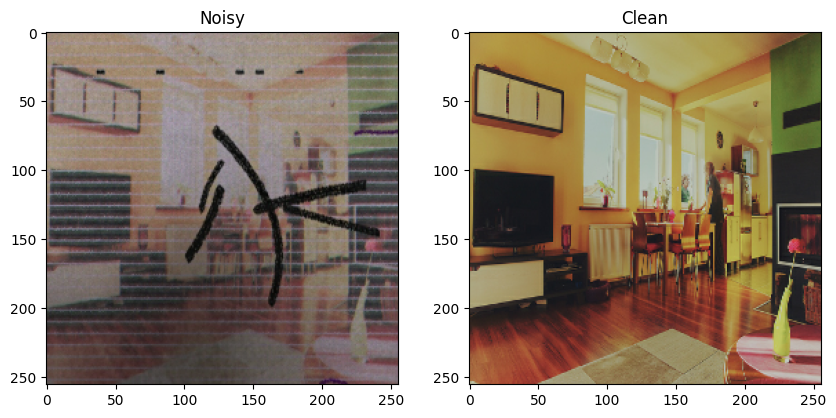

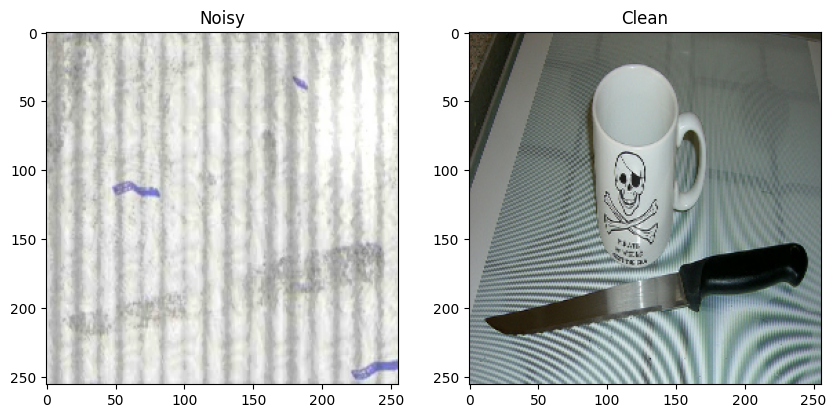

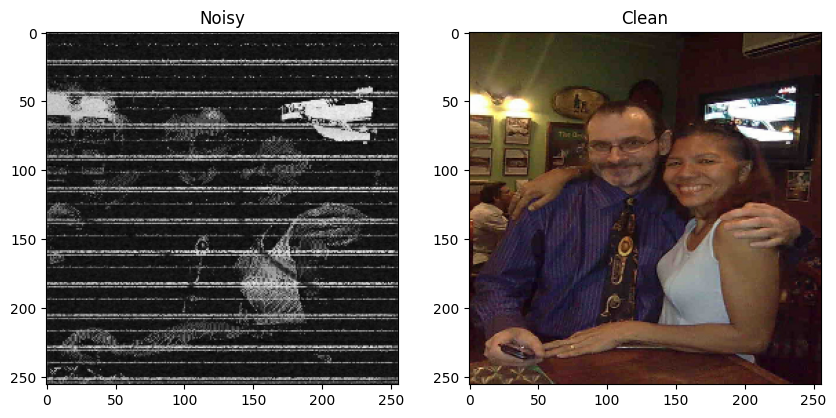

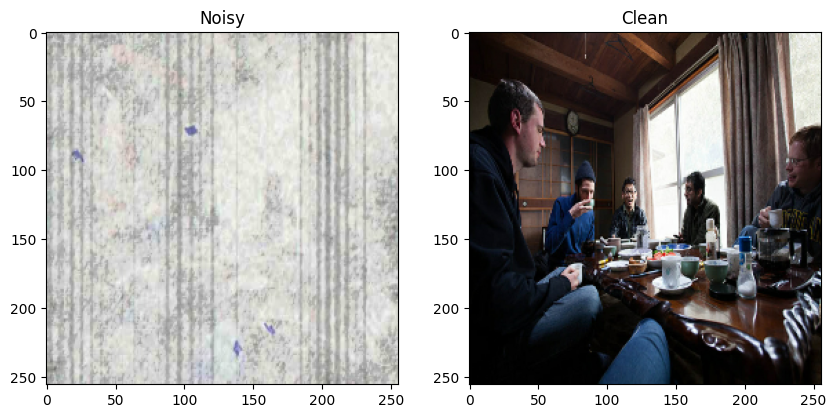

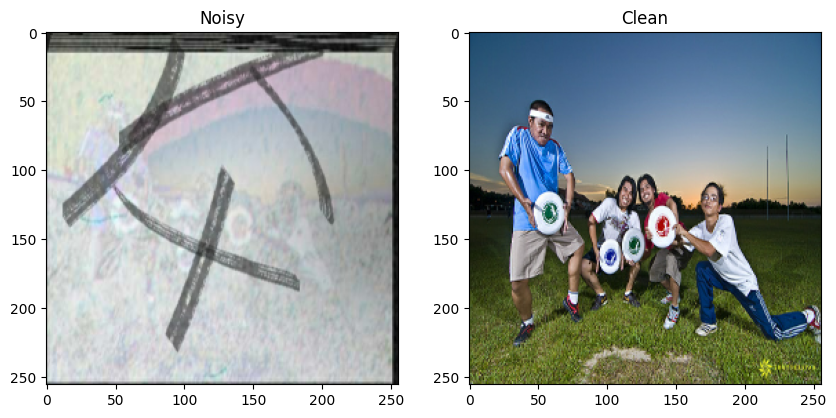

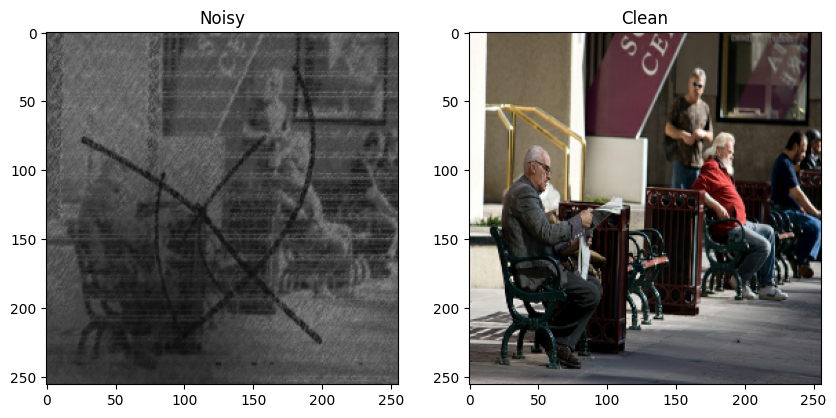

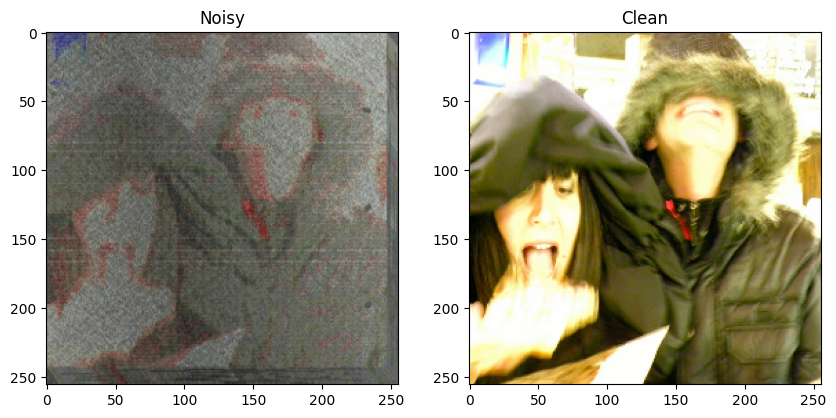

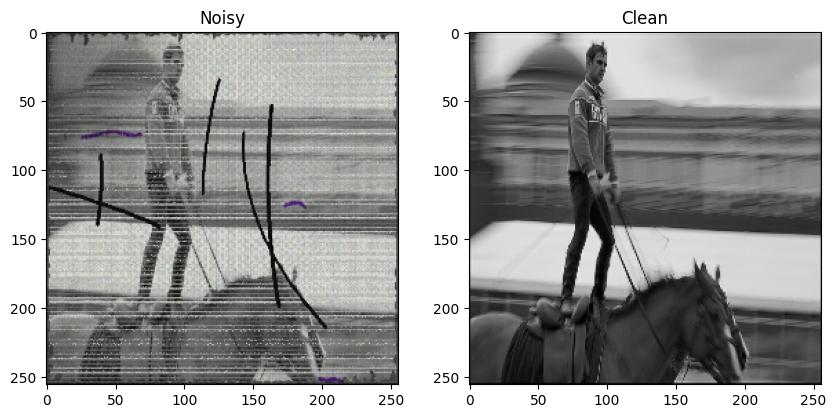

In [20]:
for noisy, clean in val_dataset.take(8):

  noisy = noisy.numpy()[0]/255.
  clean = clean.numpy()[0]/255.
  
  plt.figure(figsize=(10, 5))
  plt.subplot(1, 2, 1)
  plt.title('Noisy')
  plt.imshow(noisy)
  plt.subplot(1, 2, 2)
  plt.imshow(clean)
  plt.title('Clean')
  plt.show()